# Notebook 4 - Education Data based on Race
In this notebook we still explore the relation between GDP and Education; this time, however, instead of focusing on different counties, we look at the racial disparity in earnings and the percentage of people who attended college.

## Data Used
**GDP**: We conduct web-scraping on the [U.S. Department of Labor](https://www.dol.gov/agencies/ofccp/about/data/earnings/race-and-ethnicity) that provides us with a clear analysis of income per race per county. 

**EDUCATION**: We used data on education attainment by race by the already-used [U.S. Census Bureau](https://www.census.gov/data/tables/time-series/demo/educational-attainment/cps-historical-time-series.html) in the Excel .xlsx format.

In [2]:
#Required imports for the project
import requests # for api requests
import pandas as pd #tabular data

from bs4 import BeautifulSoup

In [3]:
# !! REMINDER TO TAKE API KEY OUT OF CODE BEFORE SUBMITTING !!
api_key = "07e7023663c44b8f1179b4918403f04506e6264b"

In [4]:
import pandas as pd

# Read in the data
edu_race = pd.read_excel('../data/edu_perc_race.xlsx')
edu_race

,Year,All people,White,"White alone, not Hispanic",Black,Asian,Hispanic (any race),White alone or in combination,"White alone or in combination, not Hispanic",Black alone or in combination,Asian alone or in combination
0,2022,37.7,37.9,41.8,27.6,59.3,20.9,37.8,41.7,27.8,58.8
1,2021,37.9,37.9,41.9,28.1,61.0,20.6,37.9,41.8,28.3,60.7
2,2020,37.5,37.5,41.3,27.8,61.1,20.8,37.4,41.2,28.1,60.3
3,2019,36.0,36.3,40.1,26.1,58.1,18.8,36.2,40.0,26.3,57.7
4,2018,35.0,35.2,38.8,25.2,56.5,18.3,35.1,38.7,25.4,56.0
5,2017,34.2,34.5,38.1,23.9,54.8,17.2,34.4,38.0,24.2,54.4
6,2016,33.4,33.7,37.3,23.3,55.9,16.4,33.6,37.2,23.5,55.4
7,2015,32.5,32.8,36.2,22.5,53.9,15.5,32.7,36.2,22.7,53.7
8,2014,32.0,32.3,35.6,22.2,52.3,15.2,32.2,35.5,22.7,52.2
9,2013,31.7,32.0,35.2,21.8,53.2,15.1,31.9,35.1,22.0,52.8


In [5]:
# Transform the Year column into datetime
edu_race['Year'] = pd.to_datetime(edu_race['Year'], format='%Y')

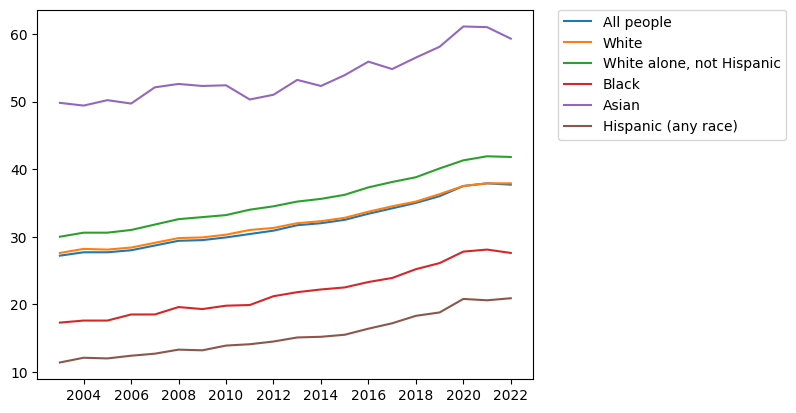

In [6]:
# Plot the data
import matplotlib.pyplot as plt

plt.plot(edu_race["Year"],edu_race["All people"], label="All people")
plt.plot(edu_race["Year"],edu_race["White"], label="White")
plt.plot(edu_race["Year"],edu_race["White alone, not Hispanic"], label="White alone, not Hispanic")
#replicate for the remaining columns
plt.plot(edu_race["Year"],edu_race["Black"], label="Black")
plt.plot(edu_race["Year"],edu_race["Asian"], label="Asian")
plt.plot(edu_race["Year"],edu_race["Hispanic (any race)"], label="Hispanic (any race)")
#show labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) #This places the legend box outside the plot
plt.show()

The further education level of US Asians is neatly higher than the rest of the population. In the next steps we will verify if this is noticed also on their GDP.

The data from the GDP per race is from a three-year-period [spanning from 2017 to 2019](https://www.dol.gov/sites/dolgov/files/OFCCP/earnings/files/Earnings%20Disparity%20Data%20Methodology%2007-10-20%20508c.pdf). We will combine data from that years to notice any relevant correlation.

In [7]:
gdp_race = pd.read_excel('../data/gdp_per_race.xlsx')
gdp_race=gdp_race[gdp_race["State"]=="NATIONAL"]
gdp_race = gdp_race[~((gdp_race["Data Type"] == "Native American/American Indian") | (gdp_race["Data Type"] == "Multiracial"))]
gdp_race = gdp_race.rename(columns={"Data Type": "Race"})

gdp_race

,State,Race,Average Weekly Earnings,Number of Workers,Earnings Disparity,Employed Percent
0,NATIONAL,White,-,9.748495e+07,1.000000,0.626741
1,NATIONAL,Black,791.005786,1.778119e+07,0.755846,0.114317
3,NATIONAL,Asian-Pacific Islander,1168.821931,1.007128e+07,1.116869,0.064749
4,NATIONAL,Hispanic/Latino,762.795413,2.684918e+07,0.728890,0.172616


Looking at the national level, we can see there is a disparity between races. Returning to our original example, we will now see whether this difference is more nuanced when looking at California.

In [28]:
#Getting data on the ethnic composition of counties in the United States for five selected race
#categories. In addition, Hispanic/Latino identity is also included. The info comes from the
#2019 american community survey(https://www.census.gov/data/developers/data-sets/acs-5year.html)
url = "https://api.census.gov/data/2019/acs/acs5?get=B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B03001_002E&for=county:*&key={}".format(api_key)
response = requests.request("GET", url)

In [29]:
#creating a dataframe function
def json_to_dataframe(response):
    return pd.DataFrame(response.json()[1:], columns=response.json()[0])

In [30]:
#converting the json data into a pandas dataframe
race_county = json_to_dataframe(response)

In [31]:
df = pd.DataFrame(data = race_county)
df = df.rename(columns={'B02001_001E': 'County Total Population', 'B02001_002E': 'County Population of White \
                         Alone', 'B02001_003E' : ' County Population of Black Alone', 'B02001_004E': 'County \
                            Population of Native American alone', 'B02001_005E': 'County Population of Asian  \
                                alone' , 'B03001_002E' : 'County Population of Hispanic/Latino'})

In [41]:
df

,County Total Population,County Population of White Alone,County Population of Black Alone,County Population of Native American alone,County Population of Asian alone,County Population of Hispanic/Latino,state,county
0,21565,20245,1007,68,116,21162,17,051
1,29003,25667,2003,73,218,28018,17,107
2,23994,22234,632,53,178,23566,17,165
3,701473,531609,47385,2162,54157,549332,17,097
4,14219,12956,830,6,29,13800,17,127
...,...,...,...,...,...,...,...,...
3215,14399,11447,1877,17,48,12878,47,033
3216,7401,4997,2110,10,18,7229,47,095
3217,461104,394105,40147,1306,10114,441397,47,093
3218,197518,162240,3198,1526,5069,154669,53,005


In [50]:
df.dtypes

County Total Population                                                   object
County Population of White                          Alone                 object
 County Population of Black Alone                                         object
County                             Population of Native American alone    object
County Population of Asian                                  alone         object
County Population of Hispanic/Latino                                      object
state                                                                     object
county                                                                    object
dtype: object

In [56]:
#Changing data types of the columns
df['county'] = df['county'].astype(int)
df['County Total Population'] = df['County Total Population'].astype(int)
df[' County Population of Black Alone'] = df[' County Population of Black Alone'].astype(int)
df['County Population of White                          Alone'] = df['County Population of White                          Alone'].astype(int)
df['County                             Population of Native American alone'] = df['County                             Population of Native American alone'].astype(int)
df['County Population of Asian                                  alone'] = df['County Population of Asian                                  alone'].astype(int)
df['County Population of Hispanic/Latino'] = df['County Population of Hispanic/Latino'].astype(int)
df['state'] = df['state'].astype(int)

In [57]:
#Creating a function to add percentage columns to this dataframe for each population column specified
def add_column_percentage(df, county_populations):
    result_df = pd.DataFrame()
    for column_name in county_populations:
        result_df[f"{column_name}_percentage"] = df[column_name] / df.iloc[:, 0] * 100
    result_df = pd.concat([df, result_df], axis=1)

    return result_df

In [59]:
#Using the created function to convert the columns
race_categories = ['County Population of White                          Alone',
       ' County Population of Black Alone',
       'County                             Population of Native American alone',
       'County Population of Asian                                  alone',
       'County Population of Hispanic/Latino']
add_column_percentage(df, race_categories)

,County Total Population,County Population of White Alone,County Population of Black Alone,County Population of Native American alone,County Population of Asian alone,County Population of Hispanic/Latino,state,county,County Population of White Alone_percentage,County Population of Black Alone_percentage,County Population of Native American alone_percentage,County Population of Asian alone_percentage,County Population of Hispanic/Latino_percentage
0,21565,20245,1007,68,116,21162,17,51,93.878971,4.669604,0.315326,0.537909,98.131231
1,29003,25667,2003,73,218,28018,17,107,88.497742,6.906182,0.251698,0.751646,96.603800
2,23994,22234,632,53,178,23566,17,165,92.664833,2.633992,0.220889,0.741852,98.216221
3,701473,531609,47385,2162,54157,549332,17,97,75.784670,6.755071,0.308209,7.720468,78.311211
4,14219,12956,830,6,29,13800,17,127,91.117519,5.837260,0.042197,0.203952,97.053239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,14399,11447,1877,17,48,12878,47,33,79.498576,13.035627,0.118064,0.333356,89.436766
3216,7401,4997,2110,10,18,7229,47,95,67.517903,28.509661,0.135117,0.243210,97.675990
3217,461104,394105,40147,1306,10114,441397,47,93,85.469872,8.706713,0.283233,2.193431,95.726127
3218,197518,162240,3198,1526,5069,154669,53,5,82.139349,1.619093,0.772588,2.566348,78.306281


In [61]:
#Getting the data on educational institutions and bachelor degrees
df2 = pd.read_csv("../data/gdp_and_census.csv")

In [62]:
#Merging it with the data on white population per county
merged_df = pd.merge(df, df2, on=['state', 'county'])
merged_df

,County Total Population,County Population of White Alone,County Population of Black Alone,County Population of Native American alone,County Population of Asian alone,County Population of Hispanic/Latino,state,county,GEO_ID,Number of Educational Institutions,Percent of Population with a Bachelor's Degree,GDP per Capita 2017
0,29003,25667,2003,73,218,28018,17,107,17107,0.0,15.780000,35.799139
1,701473,531609,47385,2162,54157,549332,17,97,17097,253.0,17.800000,83.330223
2,36359,34850,357,157,263,35465,18,69,18069,7.0,17.625000,35.041566
3,24149,21955,123,84,55,22128,18,181,18181,5.0,13.700000,37.041847
4,20840,20212,76,29,157,20193,18,75,18075,0.0,16.733333,41.939167
...,...,...,...,...,...,...,...,...,...,...,...,...
1388,52680,48792,2213,253,264,50795,47,43,47043,4.0,17.255556,30.850802
1389,32284,28754,2643,84,127,31445,47,79,47079,0.0,18.450000,35.453027
1390,461104,394105,40147,1306,10114,441397,47,93,47093,86.0,18.900000,52.353073
1391,197518,162240,3198,1526,5069,154669,53,5,53005,41.0,19.740909,53.341329
